# Lab 8: Classification

## Group work by: 
* Rahaf 
* Razan 
* Shahad 
* Fatimah
* Azzah 

### Step 1: Import needed libraries

In [1]:

 # optional import to ignore warnings related to libraries
import warnings
# numpy library is needed to perform mathematical operations 
import numpy as np
# matplotlib library is needed for creating plots
import matplotlib.pyplot as plt
# pandas library is needed for data analysis
import pandas as pd
# seaborn library is needed for statistical data visualization
import seaborn as sns
# sklearn library impute is needed for replacing missing values
from sklearn.impute import KNNImputer
# confusion_matrix is needed for calculating TP/FP, TN/FN scores
from sklearn.metrics import confusion_matrix
# sklearn library metrics is needed for getting performance statistics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# ignore warnings related to above libraries
warnings.filterwarnings("ignore")


### Step 2 : Read the Dataset


In [2]:
df = pd.read_csv("Clinical_Data.csv", skipinitialspace=True)
df

,#,sex,age,weight,date of admission,date of operation,date of discharge,post operative LOS,total LOS,Hospital readmission,...,RLQ rebound,guarding,RLQ mass,WBC count,neutrophils,CRP,perforation,pus,mass,complicated
0,1,M,37,100,18/07/2020,19/07/2020,22/07/2020,3,4,no,...,yes,no,no,10.8,76.4,NaN,no,no,no,no
1,2,M,45,80,23/02/2018,23/02/2018,1/3/18,6,6,no,...,yes,no,no,25.8,84,NaN,yes,yes,no,yes
2,3,M,38,NaN,15/12/2018,16/12/2018,16/12/2018,0,1,no,...,no,no,no,10.7,78.5,0.9,no,no,no,no
3,4,M,35,NaN,11/8/18,12/8/18,14/08/2018,2,3,no,...,yes,no,no,14.3,72.5,NaN,no,yes,no,yes
4,5,M,51,NaN,29/03/2019,29/03/2019,2/4/19,4,4,no,...,no,yes,no,15.0,91,5.7,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,410,M,26,78,23/01/2021,24/01/2021,25/01/2021,1,2,no,...,no,no,no,12.1,84.1,NaN,no,no,no,no
410,411,M,19,60,3/2/21,4/2/21,5/2/21,1,2,no,...,yes,no,no,15.5,81,NaN,no,no,no,no
411,412,F,45,51,5/2/21,6/2/21,7/2/21,1,2,no,...,yes,yes,no,12.0,74.7,7.69,no,no,no,no
412,413,M,18,51,11/2/21,12/2/21,17/02/2021,5,6,yes,...,no,no,no,11.6,79.1,NaN,yes,no,no,yes


### Step 3: Perform Preprocessing Steps

In [3]:
df.drop(columns=['#', 'date of admission', 'date of operation', 
'date of discharge'], inplace=True, axis=1)

In [4]:
# strip before and after whitespaces from all the rows and columns
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
# a pply strip to all column names
df.columns = df.columns.str.strip()

In [5]:
df = df.replace(['N/a', 'n/a', 'No', 'N\\a', 'N\a', 'Nill'], np.nan)
df = df.replace({'neutrophils': {',': '', ', ': ''}}, regex=True)
df = df.replace({'CRP': {'<': '', '>': '', '<=': '', '>=': ''}}, regex=True)

In [6]:
df['weight'] = df['weight'].astype('float')
df['symptoms days'] = df['symptoms days'].astype('float')
df['neutrophils'] = df['neutrophils'].astype('float')
df['CRP'] = df['CRP'].astype('float')

In [7]:
df["sex"].replace({
"M":1,
"F":0
}, inplace=True)

In [8]:
order = {'yes': 1, 'no': 0}
df['Hospital readmission'] = df['Hospital readmission'].map(order)
df['diarrhea'] = df['diarrhea'].map(order)
df['nausea'] = df['nausea'].map(order)
df['vomiting'] = df['vomiting'].map(order)
df['epigastric or priumblical pain'] = df['epigastric or priumblical pain'].map(order)
df['generalized abdominal pain'] = df['generalized abdominal pain'].map(order)
df['pain migration'] = df['pain migration'].map(order)
df['pain radiation'] = df['pain radiation'].map(order)
df['loclized RLQ pain'] = df['loclized RLQ pain'].map(order)
df['dysurea'] = df['dysurea'].map(order)
df['lack of apetite'] = df['lack of apetite'].map(order)
df['RLQ tenderness'] = df['RLQ tenderness'].map(order)
df['RLQ rebound'] = df['RLQ rebound'].map(order)
df['guarding'] = df['guarding'].map(order)
df['RLQ mass'] = df['RLQ mass'].map(order)
df['perforation'] = df['perforation'].map(order)
df['pus'] = df['pus'].map(order)
df['mass'] = df['mass'].map(order)
df['complicated'] = df['complicated'].map(order)

### Step 4: Apply KNN Imputation – to replace missing values

In [9]:
# Perform KNN Imputation 
imputer = KNNImputer(n_neighbors=5) # 5 is the default value
df_KNN = imputer.fit_transform(df)
df_KNN = pd.DataFrame(df_KNN, columns=df.columns) # Use original column names
# Apply rounding function to avoid decimal values for binary Yes/No features
df_Rounded = pd.DataFrame(np.round(df_KNN), columns=df_KNN.columns)


### Step 5: Apply Feature Scaling using MinMax Scalar

In [10]:
# Scale the features using the mixmax scaler (all values between 0 and 1)
# There are different ways to scale the features. We used MinMaxScaler.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xColumns = df_Rounded.columns

df = pd.DataFrame(scaler.fit_transform(df_Rounded), columns=xColumns)

### Step 6: Split the Dataset into X (independent) and y(dependent) sets

In [11]:
# Split the data into X (independent) and y(dependent) datasets independent variables
X = df.iloc[:, :-1]
# dependent variable (target class)
y = df.iloc[:,-1]

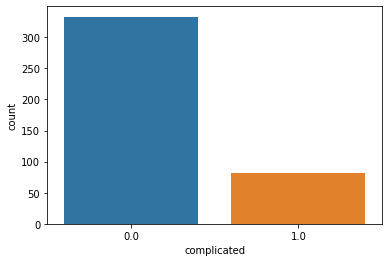

In [12]:
# visualize target class 
df['complicated'].value_counts()

sns.countplot(x='complicated', data=df);

In [13]:
# Splitting the dataset into the Training set (80%) and Test set (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# returns contiguous flattened array(1D array
y_train = y_train.ravel()

### Step 8: Apply Feature Selection – to reduce the number of dimensions

These are the top (highest to lowerst) features that give lot of informatino on our target variable


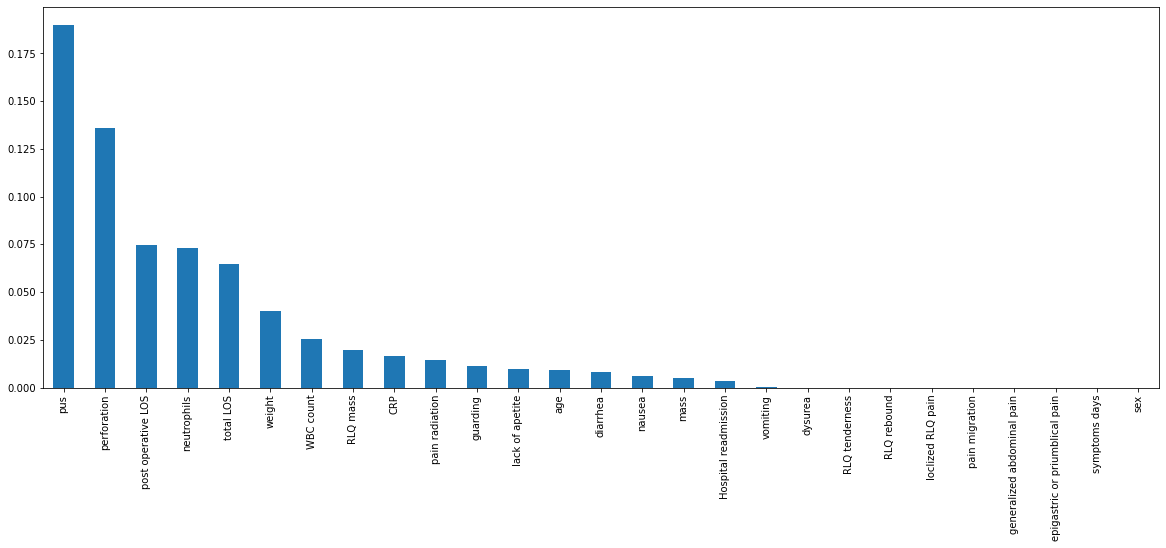

In [14]:
# Apply dimensionality reduction
# sklearn.feature_selection.mutual_info_classif
# Estimate mutual information for a discrete target variable.
from sklearn.feature_selection import mutual_info_classif
mutualInfoArray = mutual_info_classif(X_train.fillna(0), #set any na/NaN values to zero
y_train)
# list all the scores in an array
mutualInfoArray
# Display mutual information (highest to lowerst) along with feature names
mutualInfo1 = pd.Series(mutualInfoArray)
mutualInfo1.index = X_train.columns
mutualInfo1.sort_values(ascending=False)
# Display mutual information in a graphical representation
mutualInfo1.sort_values(ascending=False).plot.bar(figsize=(20,7))
print('These are the top (highest to lowerst) features that give lot of informatino on our target variable')
# Select the top n features which are important in determining target class (dependent variable) 
# sklearn.feature_selection.SelectKBest
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
# IMPORTANT: There are differnt feature selection options. SelectKBest is one of them.
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection
from sklearn.feature_selection import SelectKBest
selectTopNFeatures = SelectKBest(mutual_info_classif, k=15)
selectTopNFeatures.fit(X_train, y_train)
# hold the most important features
cols = X_train.columns[selectTopNFeatures.get_support()]
cols
# Keep the most important features and delete the rest from both test and training sets
X_train = X_train.loc[:, cols]
X_test = X_test.loc[:, cols]
# make sure only the most important features are retained
# X_train, X_test

Step 9

In [15]:
# Apply SMOTE for sampling. You will need to install pip install implearn
# https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote- techniques/
from imblearn.over_sampling import SMOTE
# sampling_stragety means the number of samples to be generated
# k_neighbors means the number of neighbors to be used
# random_state means the random state to be used
# sampling_strategy = 0.3, k_neighbors = 5, random_state = 200
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

# Print the oversampling results
print("\n\t Post OverSampling, the shape of X_train: {}".format(X_train.shape))
print("\t Post OverSampling, the shape of y_train: {}".format(y_train.shape))
print("Post OverSampling, label count '1': {}".format(sum(y_train == 1)))
print("Post OverSampling, label count '0': {}".format(sum(y_train == 0))) 


	 Post OverSampling, the shape of X_train: (532, 15)
	 Post OverSampling, the shape of y_train: (532,)
Post OverSampling, label count '1': 266
Post OverSampling, label count '0': 266


Plot Bar Graph for Training &
Validation Data

In [16]:
from sklearn.model_selection import cross_validate
def Print_Cross_Validation_Statistics(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model, X=_X, y=_y, cv=_cv, scoring=_scoring,return_train_score=True)
    # return results as a dictionary
    return {"Training Accuracy scores": results['train_accuracy'],
    "Mean Training Accuracy": results['train_accuracy'].mean()*100,
    "Training Precision scores": results['train_precision'],
    "Mean Training Precision": results['train_precision'].mean(),
    "Training Recall scores": results['train_recall'],
    "Mean Training Recall": results['train_recall'].mean(),
    "Training F1 scores": results['train_f1'],
    "Mean Training F1 Score": results['train_f1'].mean(),
    "Validation Accuracy scores": results['test_accuracy'],
    "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
    "Validation Precision scores": results['test_precision'],
    "Mean Validation Precision": results['test_precision'].mean(),
    "Validation Recall scores": results['test_recall'],
    "Mean Validation Recall": results['test_recall'].mean(),
    "Validation F1 scores": results['test_f1'],
    "Mean Validation F1 Score": results['test_f1'].mean()
    }

Plot Confusion Matrix

In [17]:
# Plot grouped Bar Chart for both training and validation data
def Plot_result(x_label, y_label, plot_title, train_data, val_data):
    # Set size of plot
    plt.figure(figsize=(12,6))
    labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
    X_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
    plt.title(plot_title, fontsize=30)
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

In [18]:
# Plot confusion matrix function
# A confusion matrix is a table that is used to define the performance of a classification algorithm.
# A confusion matrix visualizes and summarizes the performance of a classification algorithm.
import itertools
# Draw a confusion matrix using Matplotlib
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
def Plot_Confusion_Matrix(cm,url_types, title, cmap=plt.cm):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

            
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(title, fontsize=18)
    plt.show()



Naive Bayes

[[1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]]
[[62  5]
 [ 4 12]]


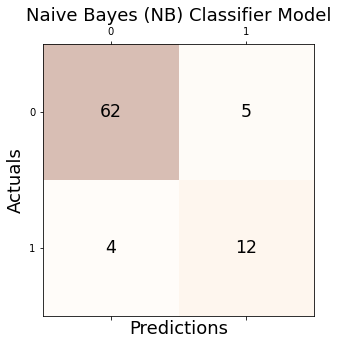

Training Accuracy scores: [0.90823529 0.91764706 0.91079812 0.91079812 0.90610329]
Mean Training Accuracy: 91.07163766915217
Training Precision scores: [0.94845361 0.93596059 0.93969849 0.93103448 0.94818653]
Mean Training Precision: 0.9406667406197539
Training Recall scores: [0.86384977 0.89622642 0.87793427 0.88732394 0.85915493]
Mean Training Recall: 0.8768978651784923
Training F1 scores: [0.9041769  0.91566265 0.90776699 0.90865385 0.90147783]
Mean Training F1 Score: 0.9075476447473474
Validation Accuracy scores: [0.86915888 0.90654206 0.94339623 0.94339623 0.89622642]
Mean Validation Accuracy: 91.17439605007937
Validation Precision scores: [0.91489362 0.95833333 0.94339623 0.97959184 0.90384615]
Mean Validation Precision: 0.9400122334701105
Validation Recall scores: [0.81132075 0.85185185 0.94339623 0.90566038 0.88679245]
Mean Validation Recall: 0.8798043326345212
Validation F1 scores: [0.86       0.90196078 0.94339623 0.94117647 0.8952381 ]
Mean Validation F1 Score: 0.90835431531

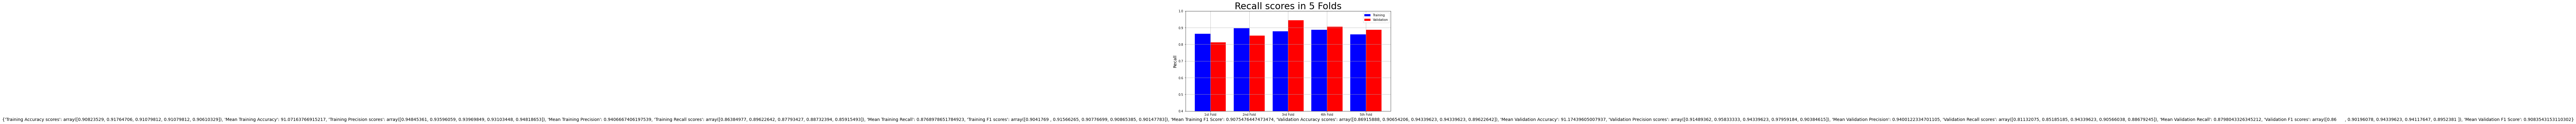

In [19]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)
# Predict test set data and compare results from the actual test
set
nb_y_pred = NBClassifier.predict(X_test)
# verify predicted values with the test set actual values
print(np.concatenate((nb_y_pred.reshape(len(nb_y_pred), 1),
y_test.values.reshape(len(y_test), 1)), 1))

# Create a Confusion Matrix for measuring the performance of the model
NBconfMatrix = confusion_matrix(y_test, nb_y_pred)
print(NBconfMatrix)
# accuracy_score(y_test, nb_y_pred)
# Plot confusion matris
Plot_Confusion_Matrix(NBconfMatrix,np.unique(y_test),title="Naive Bayes (NB) Classifier Model")

# perform n-cross-validation and print results
NBResults = Print_Cross_Validation_Statistics(NBClassifier,X_train,y_train,5)
# print dictionary results line by line(DTResults)
for key in NBResults:
    print (f"{key}: {NBResults[key]}")
# plot the results
Plot_result(NBResults,"Recall","Recall scores in 5 Folds",NBResults["Training Recall scores"],NBResults["Validation Recall scores"])